In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np

from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
import pandas as pd

dataset=pd.read_csv('../input/nlp-getting-started/train.csv')

In [3]:
dataset.head(3)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1


In [4]:
sentences=dataset['text'].tolist()
labels=dataset['target'].tolist()

In [6]:
training_size=int(len(dataset)*0.8)

training_sentences=sentences[0:training_size]
training_labels=labels[0:training_size]

validation_sentences=sentences[training_size:]
validation_labels=labels[training_size:]

In [7]:
training_labels_final=np.array(training_labels)
validation_labels_final=np.array(validation_labels)

**Tokenize the words and sequence the sentences**

In [8]:
vocab_size=1000
embedding_size=16
max_length=50
trunc_type='post'
padding_type='post'
oov_tok='<OOV>'

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer=Tokenizer(num_words=1000,oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index=tokenizer.word_index

**Pad the Sequences**

In [9]:
training_sequences=tokenizer.texts_to_sequences(training_sentences)
training_padded=pad_sequences(training_sequences,maxlen=max_length,
                             truncating=trunc_type,
                             padding=padding_type)

validation_sequences=tokenizer.texts_to_sequences(validation_sentences)
validation_padded=pad_sequences(validation_sequences,maxlen=max_length,
                             truncating=trunc_type,
                             padding=padding_type)


In [10]:
def predict_review(model,reviews):
    padding_type="post"
    sample_sequences=tokenizer.texts_to_sequences(reviews)
    review_padded=pad_sequences(sample_sequences,maxlen=max_length,padding=padding_type)
    classes=model.predict(review_padded)

    for x in range(len(reviews)):
        print(reviews[x])
        print(classes[x])
        print()


In [11]:
def fit_model_and_show_results(model,reviews):
    model.summary()
    history=model.fit(training_padded,training_labels_final,
                      epochs=num_epochs,
                      validation_data=(validation_padded,validation_labels_final))
    plot_graphs(history,'accuracy')
    plot_graphs(history,'loss')
    predict_review(model,reviews)

In [12]:
reviews1="just happened a terrible car crash"
reviews2="apocalypse lighting"
reviews3="we're shaking.. It's an earthquake"
reviews4="Fuck off!"

new_reviews=[reviews1, reviews2 , reviews3 , reviews4]

**Embedding Model**

In [15]:
model_embedding=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_size,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_embedding.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
)

In [17]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 16)            16000     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 102       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 16,109
Trainable params: 16,109
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
191/191 [==============================] - 1s 4ms/step - loss: 0.3565 - accuracy: 0.8530 - val_loss: 0.5346 - val_accuracy: 0.7656
Epoch 2/30
191/191 [==============================] - 1s 4ms/step - loss: 0.3555 - accuracy: 0.8548 - val_

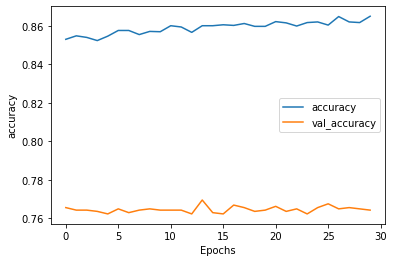

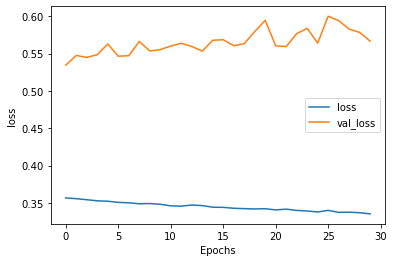

just happened a terrible car crash
[0.74549353]

apocalypse lighting
[0.2519317]

we're shaking.. It's an earthquake
[0.92974114]

Fuck off!
[0.07093663]



In [18]:
num_epochs=30
fit_model_and_show_results(model_embedding,new_reviews)

**Model CNN**

In [19]:
model_cnn=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_size,input_length=max_length),
    tf.keras.layers.Conv1D(128,5,activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_cnn.compile(
    loss='binary_crossentropy',
    optimizer="adam",
    metrics=['accuracy']
)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 16)            16000     
_________________________________________________________________
conv1d (Conv1D)              (None, 46, 128)           10368     
_________________________________________________________________
global_average_pooling1d_2 ( (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 774       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 27,149
Trainable params: 27,149
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
191/191 [==============================] - 1s 4ms/step - loss: 0.2687 - accuracy: 0.8959 - val_loss: 0.66

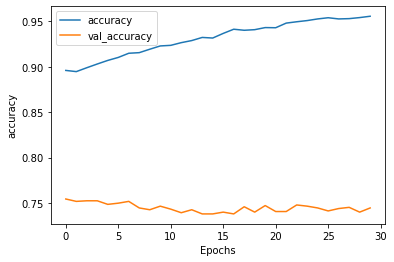

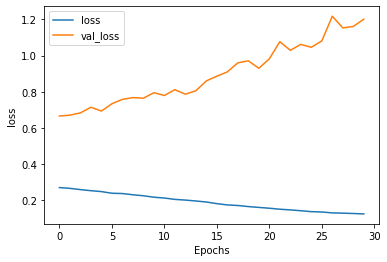

just happened a terrible car crash
[0.23139803]

apocalypse lighting
[0.16006082]

we're shaking.. It's an earthquake
[0.9996978]

Fuck off!
[0.24799836]



In [23]:
model_cnn.summary()
history=model_cnn.fit(training_padded,training_labels_final,
                    epochs=num_epochs,
                    validation_data=(validation_padded,validation_labels_final))

plot_graphs(history,'accuracy')
plot_graphs(history,'loss')
predict_review(model_cnn,new_reviews)

**Model GRU**

In [25]:
model_gru=tf.keras.Sequential([
              tf.keras.layers.Embedding(vocab_size,embedding_size,input_length=max_length),
              tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
              tf.keras.layers.Dense(6,activation='relu'),
              tf.keras.layers.Dense(1,activation='sigmoid')
])
model_gru.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 50, 16)            16000     
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                9600      
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 25,997
Trainable params: 25,997
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
191/191 [==============================] - 2s 12ms/step - loss: 0.6365 - accuracy: 0.6348 - val_loss: 0.5987 - val_accuracy: 0.7039
Epoch 2/30
191/191 [==============================] - 2s 9ms/step - loss: 0.4707 - accuracy: 0.7920 - val

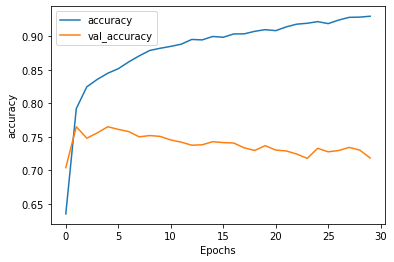

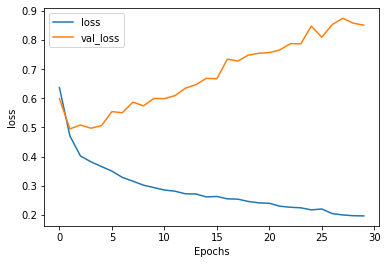

just happened a terrible car crash
[0.97990876]

apocalypse lighting
[0.18838477]

we're shaking.. It's an earthquake
[0.9936202]

Fuck off!
[0.04743278]



In [26]:
model_gru.summary()
history=model_gru.fit(training_padded,training_labels_final,
                    epochs=num_epochs,
                    validation_data=(validation_padded,validation_labels_final))

plot_graphs(history,'accuracy')
plot_graphs(history,'loss')
predict_review(model_gru,new_reviews)

**Add a Bidirectional LSTM**

In [28]:
model_bidi_lstm=tf.keras.Sequential([
              tf.keras.layers.Embedding(vocab_size,embedding_size,input_length=max_length),
              tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_size)),
              tf.keras.layers.Dense(6,activation='relu'),
              tf.keras.layers.Dense(1,activation='sigmoid')
])
model_bidi_lstm.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 50, 16)            16000     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32)                4224      
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 198       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 7         
Total params: 20,429
Trainable params: 20,429
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
191/191 [==============================] - 3s 14ms/step - loss: 0.6365 - accuracy: 0.6276 - val_loss: 0.5657 - val_accuracy: 0.7275
Epoch 2/30
191/191 [==============================] - 2s 11ms/step - loss: 0.4626 - accuracy: 0.7918 - va

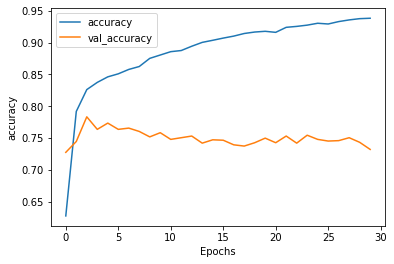

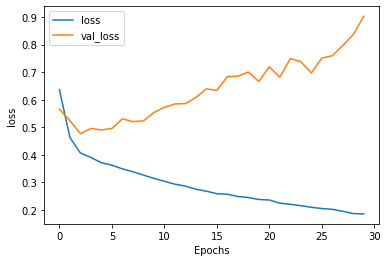

just happened a terrible car crash
[0.98773485]

apocalypse lighting
[0.13913073]

we're shaking.. It's an earthquake
[0.9991905]

Fuck off!
[0.20688584]



In [29]:
model_bidi_lstm.summary()
history=model_bidi_lstm.fit(training_padded,training_labels_final,
                    epochs=num_epochs,
                    validation_data=(validation_padded,validation_labels_final))

plot_graphs(history,'accuracy')
plot_graphs(history,'loss')
predict_review(model_bidi_lstm,new_reviews)

**Add a Multiple Bidirectional LSTM**

In [31]:
model_multi_bidi_lstm=tf.keras.Sequential([
              tf.keras.layers.Embedding(vocab_size,embedding_size,input_length=max_length),
              tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_size,return_sequences=True)),
              tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_size)),
              tf.keras.layers.Dense(6,activation='relu'),
              tf.keras.layers.Dense(1,activation='sigmoid')
])
model_multi_bidi_lstm.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 50, 16)            16000     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 50, 32)            4224      
_________________________________________________________________
bidirectional_3 (Bidirection (None, 32)                6272      
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 198       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 26,701
Trainable params: 26,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
191/191 [==============================] - 5s 24ms/step - loss: 0.6062 - accuracy: 0.6695 - val_loss: 0.5

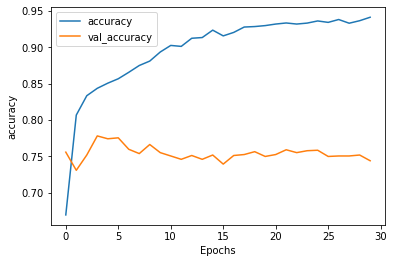

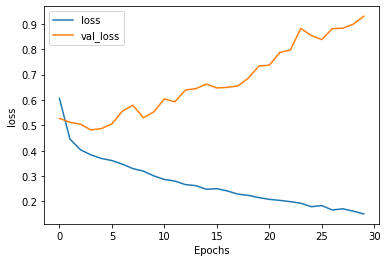

just happened a terrible car crash
[0.9746481]

apocalypse lighting
[0.29182652]

we're shaking.. It's an earthquake
[0.99048024]

Fuck off!
[0.07570001]



In [32]:
model_multi_bidi_lstm.summary()
history=model_multi_bidi_lstm.fit(training_padded,training_labels_final,
                    epochs=num_epochs,
                    validation_data=(validation_padded,validation_labels_final))

plot_graphs(history,'accuracy')
plot_graphs(history,'loss')
predict_review(model_multi_bidi_lstm,new_reviews)

In [33]:
test=pd.read_csv("../input/nlp-getting-started/test.csv")
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [34]:
test_reviews=test['text'].tolist()

In [36]:
test_reviews[:3]

['Just happened a terrible car crash',
 'Heard about #earthquake is different cities, stay safe everyone.',
 'there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all']

In [37]:
padding_type="post"
sample_sequences=tokenizer.texts_to_sequences(test_reviews)
review_padded=pad_sequences(sample_sequences,maxlen=max_length,padding=padding_type)
classes=model_embedding.predict(review_padded)


results=[]

for x in range(len(test_reviews)):
    results.append(classes[x])
        


In [42]:
res=[]
for i in range(len(results)):
    res.append(results[i][0])
    

In [47]:
results=[]
for i in range(len(res)):
    if(res[i]>=0.5):
        results.append(1)
    else:
        results.append(0)

In [48]:
dict={'id':test['id'],'target':results}

df = pd.DataFrame(dict) 



In [49]:
df.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,0
4,11,1


In [50]:
df.to_csv('submission_embedding.csv',index=False)

In [51]:
classes=model_cnn.predict(review_padded)

results=[]

for x in range(len(test_reviews)):
    results.append(classes[x])
    
res=[]
for i in range(len(results)):
    res.append(results[i][0])
    
results=[]
for i in range(len(res)):
    if(res[i]>=0.5):
        results.append(1)
    else:
        results.append(0)
        
dict={'id':test['id'],'target':results}

df = pd.DataFrame(dict) 


In [52]:
df.head()

,id,target
0,0,0
1,2,1
2,3,1
3,9,0
4,11,1


In [53]:
df.to_csv('model_cnn.csv')

In [54]:
classes=model_gru.predict(review_padded)

results=[]

for x in range(len(test_reviews)):
    results.append(classes[x])
    
res=[]
for i in range(len(results)):
    res.append(results[i][0])
    
results=[]
for i in range(len(res)):
    if(res[i]>=0.5):
        results.append(1)
    else:
        results.append(0)
        
dict={'id':test['id'],'target':results}

df = pd.DataFrame(dict) 


In [55]:
df.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,0
4,11,1


In [56]:
df.to_csv('model_gru.csv')

In [57]:
classes=model_bidi_lstm.predict(review_padded)

results=[]

for x in range(len(test_reviews)):
    results.append(classes[x])
    
res=[]
for i in range(len(results)):
    res.append(results[i][0])
    
results=[]
for i in range(len(res)):
    if(res[i]>=0.5):
        results.append(1)
    else:
        results.append(0)
        
dict={'id':test['id'],'target':results}

df = pd.DataFrame(dict) 


In [58]:
df.to_csv('model_bidi_lstm.csv')

In [59]:
classes=model_multi_bidi_lstm.predict(review_padded)

results=[]

for x in range(len(test_reviews)):
    results.append(classes[x])
    
res=[]
for i in range(len(results)):
    res.append(results[i][0])
    
results=[]
for i in range(len(res)):
    if(res[i]>=0.5):
        results.append(1)
    else:
        results.append(0)
        
dict={'id':test['id'],'target':results}

df = pd.DataFrame(dict) 


In [60]:
df.to_csv('model_multi_bidi_lstm.csv')